# Modelo de regresion lineal 

 * modelo con datos simulados
 * y = a + b * x
 * x : 100 valores distribuidos segun una N(1.5 , 2.5)
 * Ye = 2 + 0.5 * x + e
 * e : estara distribuida segun  una N (0 , 0.8)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn (100)

In [3]:
res = 0 + 0.8 * np.random.randn (100)


In [4]:
y_pred = 2 + 0.5 * x

In [5]:
y_act = 2 + 0.5 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x" : x_list,
        "y_actual" : y_act_list,
        "y_prediccion" : y_pred_list
        
    }
  
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,6.183611,3.450059,5.091805
1,1.033037,3.080732,2.516519
2,1.350147,2.089167,2.675073
3,2.918212,3.308701,3.459106
4,0.695447,2.834406,2.347724


In [9]:
y_mean = [np.mean(y_act) for i in range ( 1,len (x_list) + 1)]

Text(0.5, 1.0, 'valor actual vs prediccion')

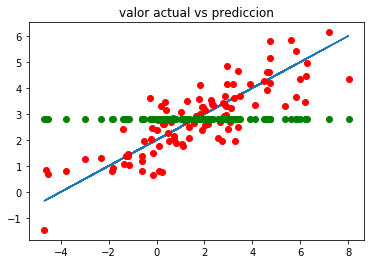

In [10]:
%matplotlib inline
plt.plot( x,y_pred)
plt.plot (x, y_act, "ro")
plt.plot ( x,y_mean,"go")
plt.title("valor actual vs prediccion")

# ¿ como es la prediccion de buena?

   * SST = SSD+SSR
   * SST : variabilidad de los datos con respecto de su media 
   * SSD: diferencia entre los daos originales y la prediccion que el modelo no es capaz de explicar (errores que deberian seguir una distribucion normal 
   * SSR : diferencia entre la regrecion y el valor medio que el modelo busca explicar 
   * R2= SSR/SST, coeficiente de determinacion entre 0 y 1

In [11]:
y_m =np.mean (y_act)
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] =  (data["y_actual"] -np.mean(y_act))**2


In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,6.183611,3.450059,5.091805,5.212238,2.695331,0.411248
1,1.033037,3.080732,2.516519,0.085412,0.318337,0.073962
2,1.350147,2.089167,2.675073,0.017876,0.343286,0.517833
3,2.918212,3.308701,3.459106,0.422933,0.022622,0.249929
4,0.695447,2.834406,2.347724,0.212566,0.236859,0.000657


In [13]:
SSR = sum (data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
SSR

164.94567151633112

In [15]:
SSD

57.02672757613206

In [16]:
SST

178.7351161029752

In [17]:
SSR+SST

343.68078761930633

In [18]:
R2 = SSR / SST

In [19]:
R2

0.9228498300317239

(array([56., 16.,  4.,  4.,  8.,  5.,  3.,  0.,  1.,  3.]),
 array([1.15172282e-05, 3.07364660e-01, 6.14717802e-01, 9.22070945e-01,
        1.22942409e+00, 1.53677723e+00, 1.84413037e+00, 2.15148352e+00,
        2.45883666e+00, 2.76618980e+00, 3.07354294e+00]),
 <a list of 10 Patch objects>)

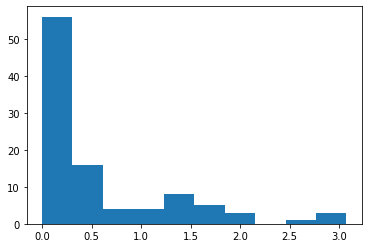

In [20]:
plt.hist(data["SSD"])

(array([ 2.,  6.,  8., 14., 19., 18., 15.,  5.,  8.,  5.]),
 array([-1.75315229, -1.40830996, -1.06346764, -0.71862531, -0.37378299,
        -0.02894066,  0.31590166,  0.66074399,  1.00558631,  1.35042864,
         1.69527096]),
 <a list of 10 Patch objects>)

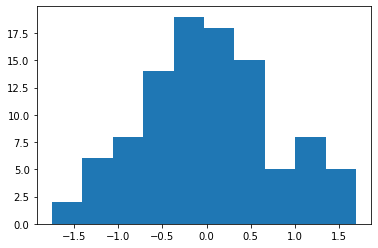

In [21]:
plt.hist(data["y_prediccion"] - data["y_actual"])

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean (data ["y_actual"])
x_mean ,y_mean 

(1.6814639540814997, 2.808772765937559)

In [23]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [24]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [25]:
alpha = y_mean - beta*  x_mean

In [26]:
alpha , beta

(2.0777788618404522, 0.43473658910304297)

# Obteniento la recta de regresion
* y = a + b * x
* b = sum (( xi - x_m) * (y_i-y_m))/sum(xi-x_m)^2)
* a= y_n - b *x_m

In [27]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean,y_mean

(1.6814639540814997, 2.808772765937559)

In [28]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_actual"] - y_mean)
data["beta_d"] = (data["x"]- x_mean)**2

In [29]:
beta = sum (data["beta_n"])/sum (data["beta_d"])

In [30]:
alpha = y_mean -beta*x_mean

In [31]:
alpha , beta

(2.0777788618404522, 0.43473658910304297)

In [32]:
# el modelo lineal optenido por regresion es: y =2.1127355674926545 + 0.49740158267564044* x

In [33]:
data["y_model"] = alpha + beta * data ["x"]

In [34]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,6.183611,3.450059,5.091805,5.212238,2.695331,0.411248,2.887164,20.269325,4.766021
1,1.033037,3.080732,2.516519,0.085412,0.318337,0.073962,-0.176346,0.420457,2.526878
2,1.350147,2.089167,2.675073,0.017876,0.343286,0.517833,0.238418,0.109771,2.664737
3,2.918212,3.308701,3.459106,0.422933,0.022622,0.249929,0.618286,1.529546,3.346432
4,0.695447,2.834406,2.347724,0.212566,0.236859,0.000657,-0.025275,0.972229,2.380115


In [35]:
SSR =  sum ((data["y_model"] -y_mean)**2)
SSD = sum ((data["y_model"] - data["y_actual"])**2)
SST =  sum ((data["y_actual"] -y_mean)**2)



In [36]:
SSR, SSD, SST

(124.61900831570851, 54.11610778726678, 178.7351161029752)

In [37]:
R2 =SSR/SST

In [38]:
R2

0.6972273330099911

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

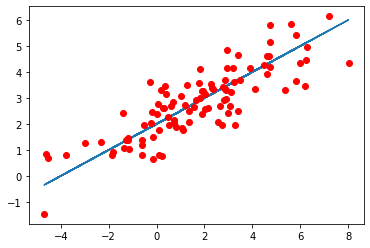

In [39]:
%matplotlib inline
plt.plot( x,y_pred)
plt.plot (x, y_act, "ro")
plt.plot ( x,y_mean,"go")
plt.plot (data["x"],data["y_model"])
plt.title("valor actual vs prediccion")

# Error estandar de los residuos(rse)

In [40]:
RSE =np.sqrt(SSD/(len(data)-2))
RSE

0.7431050945207698

In [41]:
np.mean(data["y_actual"])

2.808772765937559

In [42]:
RSE/np.mean(data["y_actual"])

0.2645657575196275